# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out]) 
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.8

In [7]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.9100 - acc: 0.3172 - val_loss: 1.7819 - val_acc: 0.3641
Epoch 2/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.7119 - acc: 0.3943 - val_loss: 1.6529 - val_acc: 0.4170
Epoch 3/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6262 - acc: 0.4261 - val_loss: 1.6749 - val_acc: 0.4055
Epoch 4/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.5721 - acc: 0.4437 - val_loss: 1.6107 - val_acc: 0.4289
Epoch 5/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5198 - acc: 0.4614 - val_loss: 1.5015 - val_acc: 0.4690
Epoch 6/50
50000/50000 [==============================] - 3s 55us/step - loss: 1.4820 - acc: 0.4743 - val_loss: 1.4850 - val_acc: 0.4693
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.4459 - acc: 0.4897 - val_loss: 1.4576 - val_acc

50000/50000 [==============================] - 3s 58us/step - loss: 1.9665 - acc: 0.3116 - val_loss: 1.9175 - val_acc: 0.3252
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8880 - acc: 0.3383 - val_loss: 1.8618 - val_acc: 0.3454
Epoch 4/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8391 - acc: 0.3562 - val_loss: 1.8175 - val_acc: 0.3639
Epoch 5/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.8047 - acc: 0.3699 - val_loss: 1.7899 - val_acc: 0.3775
Epoch 6/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.7757 - acc: 0.3803 - val_loss: 1.7621 - val_acc: 0.3877
Epoch 7/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7522 - acc: 0.3892 - val_loss: 1.7427 - val_acc: 0.3915
Epoch 8/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7316 - acc: 0.3966 - val_loss: 1.7217 - val_acc: 0.4029
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1560 - acc: 0.2436 - val_loss: 2.1442 - val_acc: 0.2526
Epoch 5/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.1275 - acc: 0.2578 - val_loss: 2.1174 - val_acc: 0.2623
Epoch 6/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.1020 - acc: 0.2665 - val_loss: 2.0936 - val_acc: 0.2706
Epoch 7/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0793 - acc: 0.2760 - val_loss: 2.0723 - val_acc: 0.2781
Epoch 8/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0589 - acc: 0.2807 - val_loss: 2.0529 - val_acc: 0.2836
Epoch 9/50
50000/50000 [==============================] - 3s 54us/step - loss: 2.0401 - acc: 0.2892 - val_loss: 2.0348 - val_acc: 0.2863
Epoch 10/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.0221 - acc: 0.2944 - val_loss: 2.0168 - val_acc: 0.2933
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 62us/step - loss: 2.3149 - acc: 0.1165 - val_loss: 2.3109 - val_acc: 0.1181
Epoch 6/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.3064 - acc: 0.1224 - val_loss: 2.3033 - val_acc: 0.1254
Epoch 7/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.2994 - acc: 0.1280 - val_loss: 2.2969 - val_acc: 0.1298
Epoch 8/50
50000/50000 [==============================] - 3s 57us/step - loss: 2.2933 - acc: 0.1321 - val_loss: 2.2913 - val_acc: 0.1353
Epoch 9/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2879 - acc: 0.1376 - val_loss: 2.2863 - val_acc: 0.1426
Epoch 10/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2830 - acc: 0.1437 - val_loss: 2.2816 - val_acc: 0.1477
Epoch 11/50
50000/50000 [==============================] - 3s 56us/step - loss: 2.2784 - acc: 0.1486 - val_loss: 2.2772 - val_acc: 0.1522
Epoch 12/50
50000/50000 [=========================

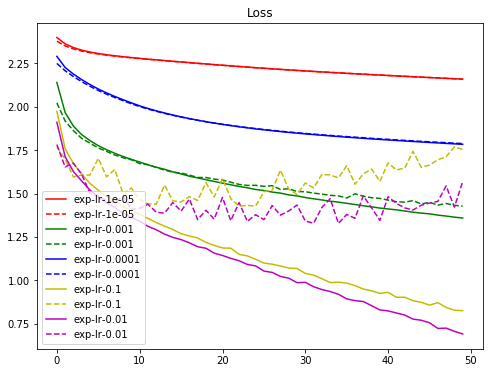

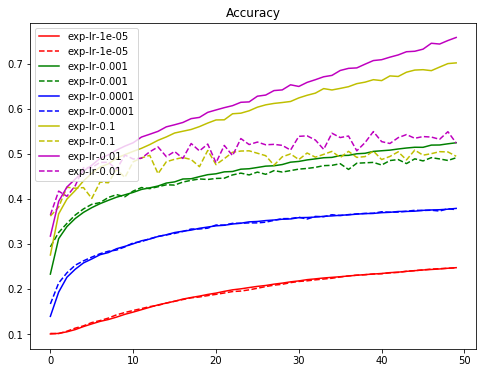

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()